# Final Project HI 2454
## Author: Arhat Pradhan

### Load Packages

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




### Load Data Set

In [28]:
df = pd.read_csv('realistic_diabetes_dataset.csv') 
df.shape

(100000, 9)

In [29]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,NaN,1.0,never,NaN,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,28.606484,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,26.136970,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,29.131167,NaN,155.0,0.0
4,Male,76.0,1.0,1.0,current,31.834369,4.8,155.0,0.0


### Data Preprocessing


#### Checking for missing values 
#### Removing  Patient data that has missing values

In [30]:
#get total missing values
na = df.isna().sum()
na

gender                 7875
age                    8232
hypertension           5315
heart_disease          6723
smoking_history        8077
bmi                    7792
HbA1c_level            5096
blood_glucose_level    6105
diabetes               9529
dtype: int64

In [31]:
#remove rows with missing values
df_nona = df.dropna()
df_nona.shape
# df_nona = df.drop('Billing_Amount', axis=1) 

(50954, 9)

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  50954.000000  50954.000000   50954.000000  50954.000000  50954.000000   
mean      41.947170      0.075225       0.040232     27.022969      5.532498   
std       22.523857      0.263756       0.196506      4.052729      1.072405   
min        0.080000      0.000000       0.000000     14.272795      3.500000   
25%       24.000000      0.000000       0.000000     24.006523      4.800000   
50%       43.000000      0.000000       0.000000     27.081084      5.800000   
75%       60.000000      0.000000       0.000000     30.046552      6.200000   
max       80.000000      1.000000       1.000000     39.914659      9.000000   

       blood_glucose_level      diabetes  
count         50954.000000  50954.000000  
mean            140.751909      0.085351  
std              45.035049      0.279407  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             145.0

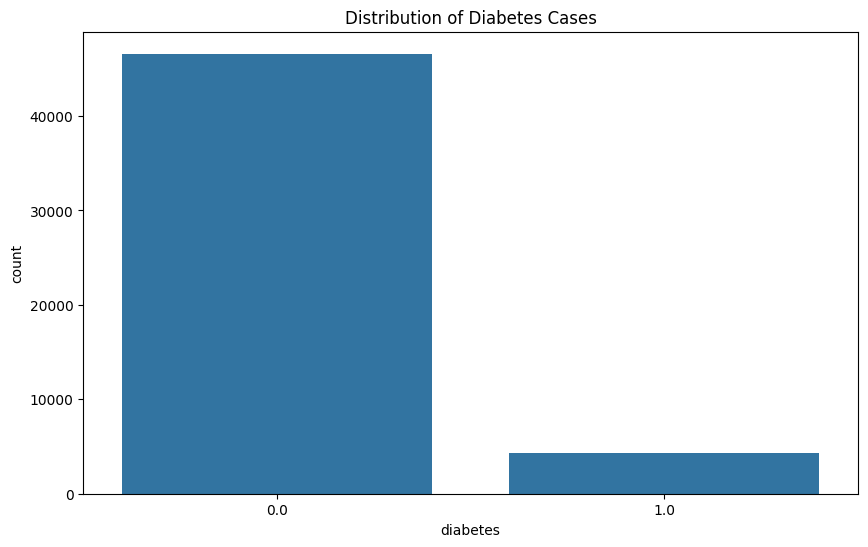

In [61]:

# Summary statistics for numerical columns
print(df_nona.describe())

plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=df_nona)
plt.title('Distribution of Diabetes Cases')
plt.show()

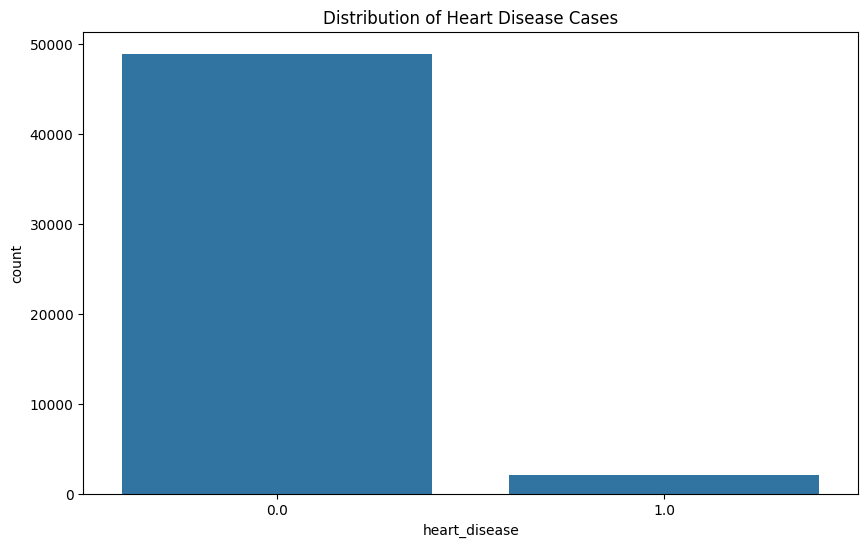

In [73]:
#number of patients with heart disease and hypertension 
plt.figure(figsize=(10, 6))
sns.countplot(x='heart_disease', data=df_nona)
plt.title('Distribution of Heart Disease Cases')
plt.show()

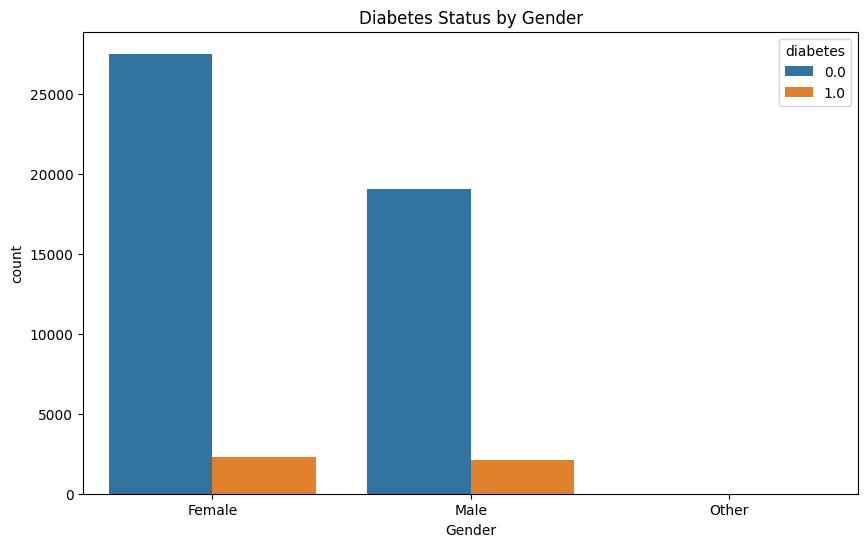

In [65]:
#diabetes status by gender 
plt.figure(figsize=(10, 6))
#look up seaborn countplot multiple barplot
#sns.barplot(data= df_nona, x = gender, y = diabetes)
sns.countplot(data = df_nona, x='gender', hue='diabetes')
plt.xlabel('Gender')
plt.title('Diabetes Status by Gender')
#remove last bar

plt.show()


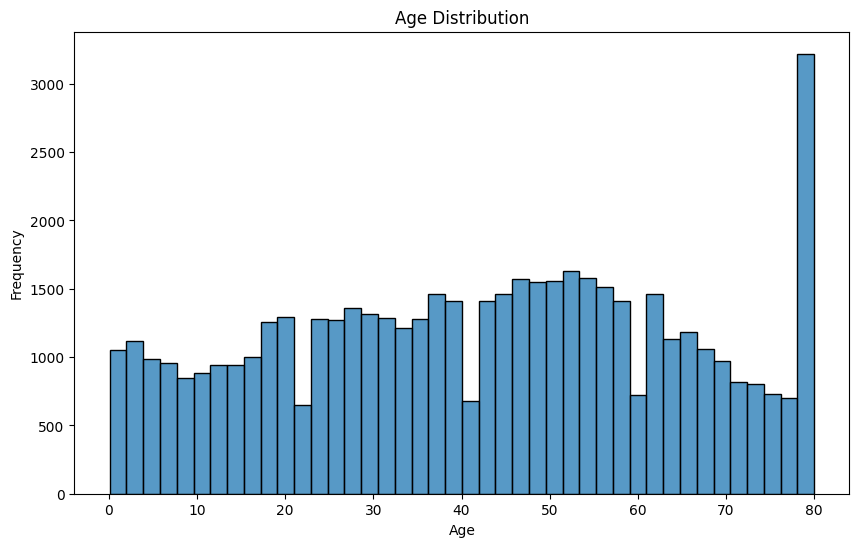

In [56]:
#age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_nona['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

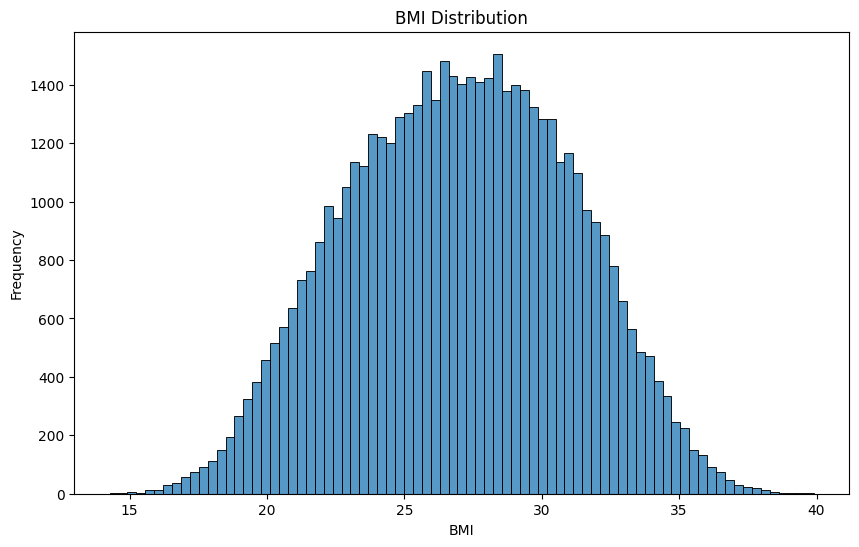

In [57]:
#bmi distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_nona['bmi'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Count')

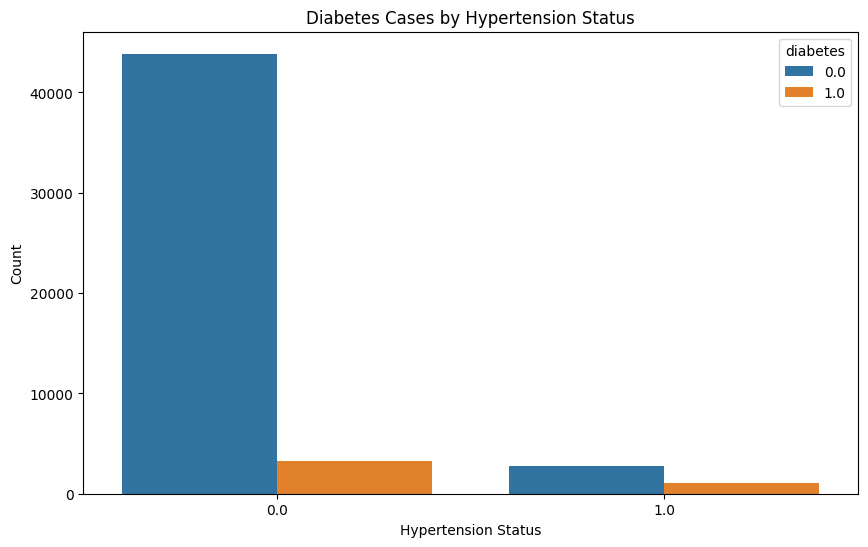

In [62]:
#count of indivduals that are diabetic with and without hypertension
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='diabetes', data=df_nona)
plt.title('Diabetes Cases by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

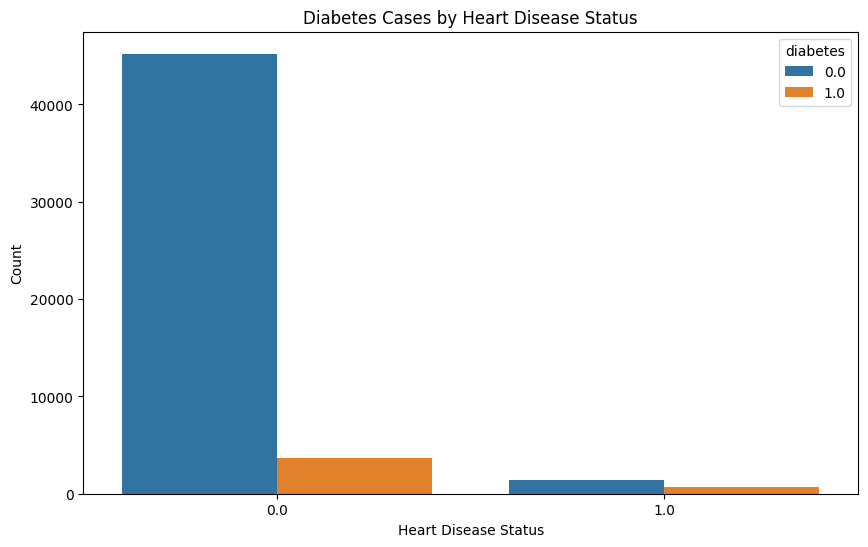

In [64]:
#count of indivduals that are diabetic with and without heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='heart_disease', hue='diabetes', data=df_nona)
plt.title('Diabetes Cases by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')


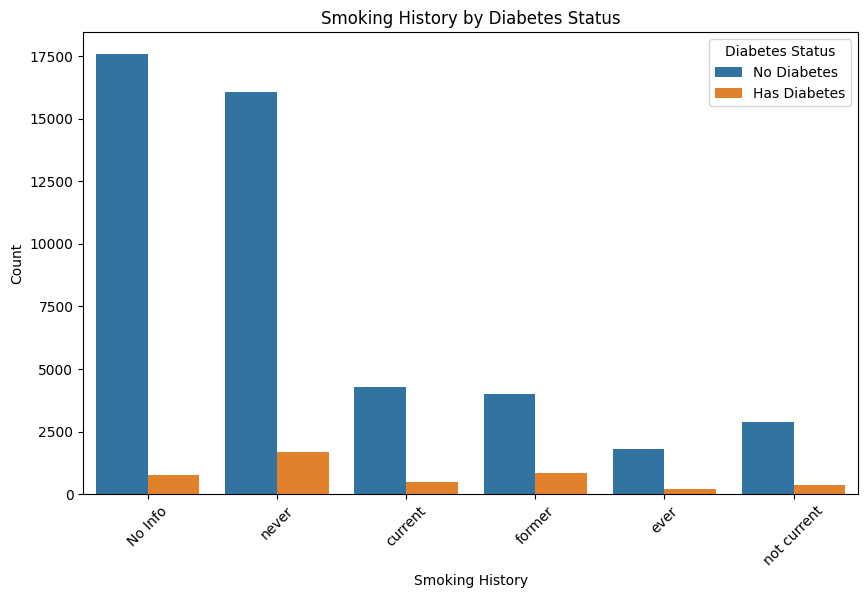

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_nona, x='smoking_history', hue='diabetes')
plt.title('Smoking History by Diabetes Status')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Has Diabetes'])
plt.xticks(rotation=45)
plt.show()

In [80]:
print(df['smoking_history'].unique())

['never' 'No Info' 'current' nan 'former' 'ever' 'not current']


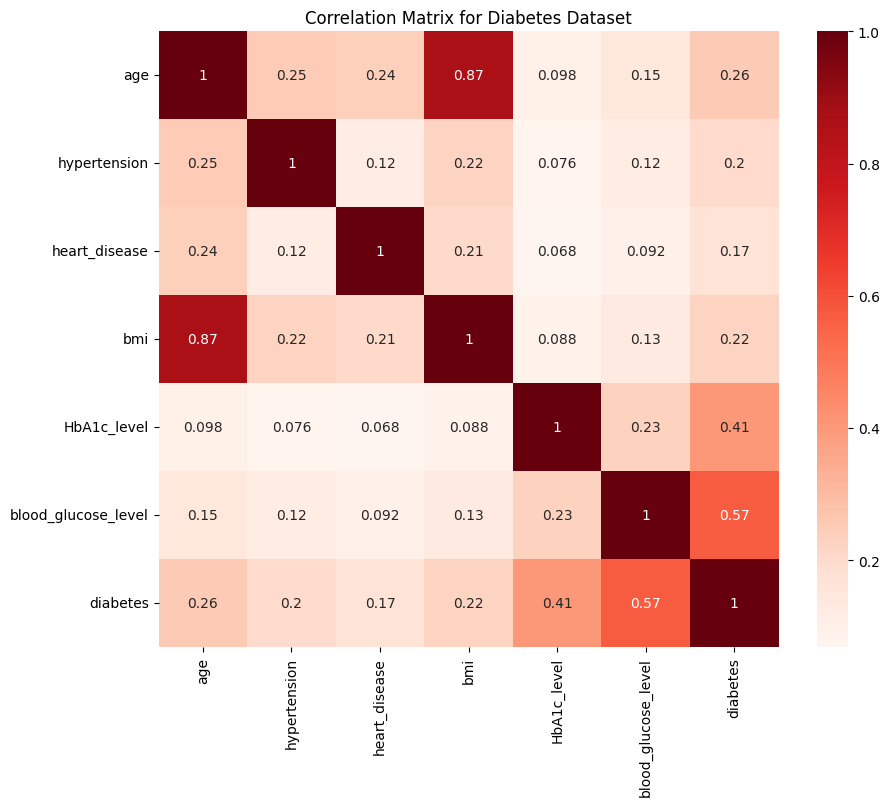

In [33]:
# Correlation matrix
correlation_matrix = df_nona.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()


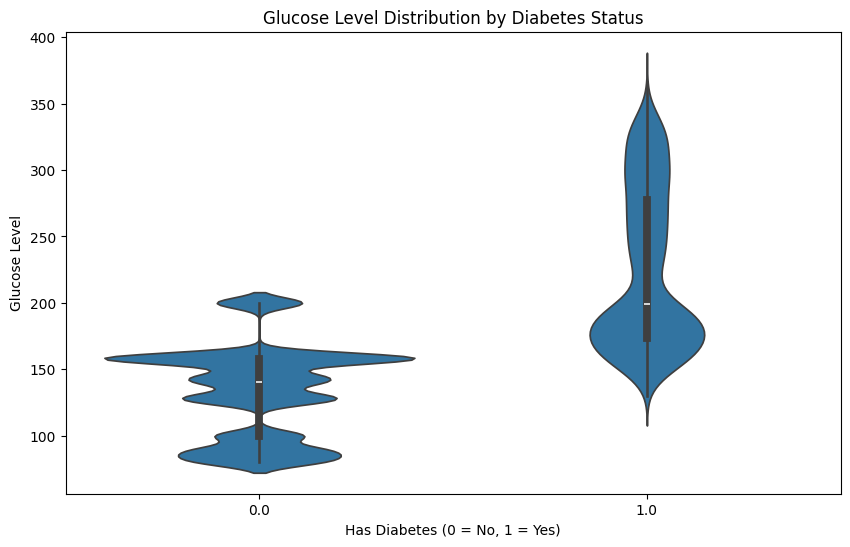

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="diabetes", y="blood_glucose_level", data=df_nona)
plt.title("Glucose Level Distribution by Diabetes Status")
plt.xlabel("Has Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()

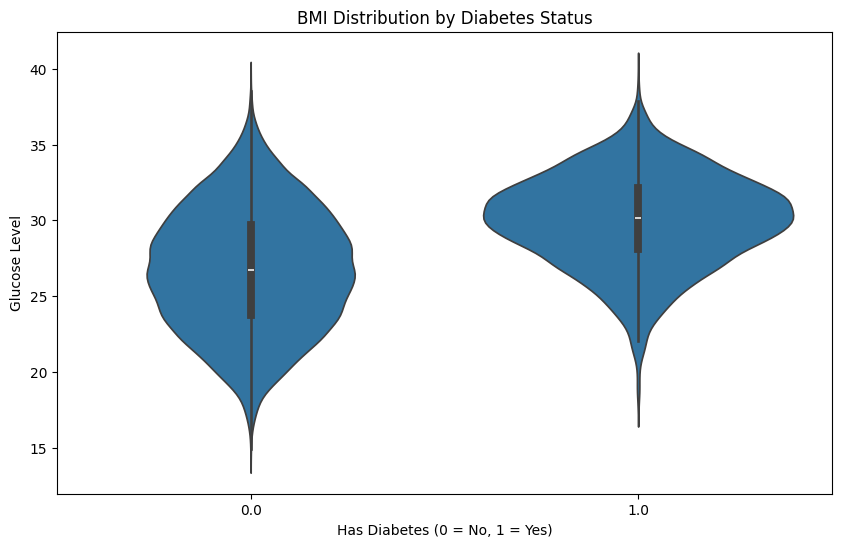

In [ ]:
# violin plot for glucose level by diabetes status
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='bmi', data=df_nona)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Has Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level')
plt.show()

In [36]:

bins = [0,10,20,30,40,50,60,70,80,90,100] 
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


df_nona['age_group'] = pd.cut(df_nona['age'], bins=bins, labels=labels, right=False) 
#copy of df slice is still ok

C:\Users\arhat\AppData\Local\Temp\ipykernel_26844\3981102642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona['age_group'] = pd.cut(df_nona['age'], bins=bins, labels=labels, right=False)


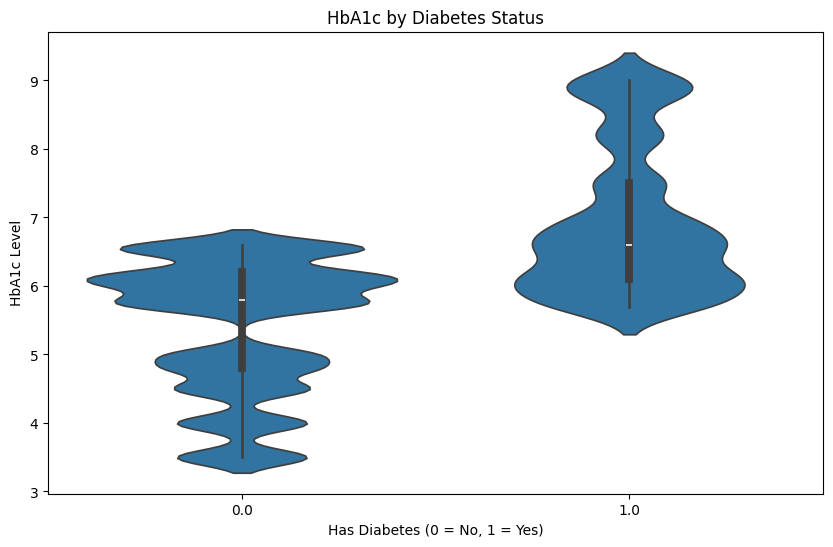

In [ ]:

plt.figure(figsize=(10, 6))
sns.violinplot(x="diabetes", y="HbA1c_level", data=df_nona) 
plt.title("HbA1c by Diabetes Status")
plt.xlabel("Has Diabetes (0 = No, 1 = Yes)")
plt.ylabel("HbA1c Level")
plt.show()

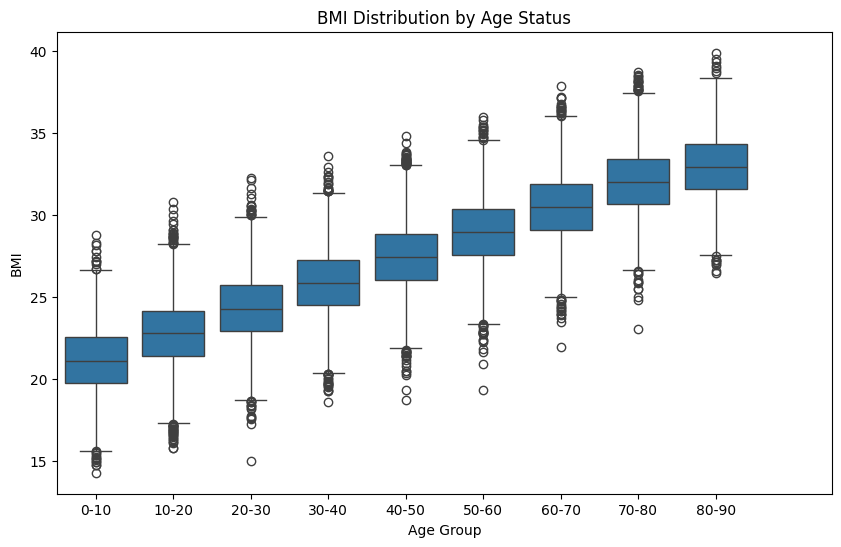

In [ ]:
# violin plot for bmi level 
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=df_nona)
plt.title('BMI Distribution by Age Status')
plt.xlabel('Age Group') 
plt.ylabel('BMI')
#remove last bin bc no data in it
plt.xticks(ticks=range(len(labels)-1), labels=labels[:-1])
plt.show()

In [44]:
print(df_nona['diabetes'].value_counts())
print(df_nona.groupby('gender')['diabetes'].sum())

0.0    46605
1.0     4349
Name: diabetes, dtype: int64
gender
Female    2269.0
Male      2080.0
Other        0.0
Name: diabetes, dtype: float64


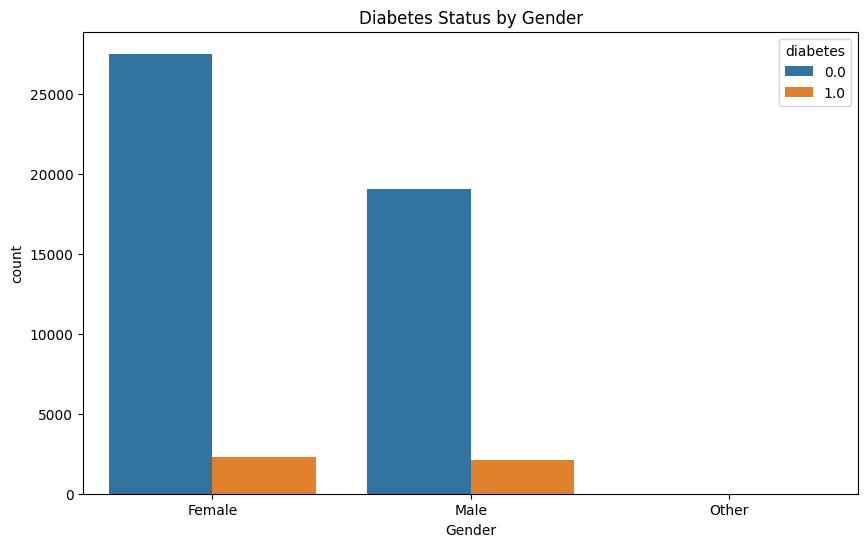

### Statistical Modeling 

### Preprocessing for Statistical Modeling

In [41]:
print(df_nona['gender'].unique())
print(df_nona.groupby('diabetes')['gender'].value_counts())


df_gender_processed = df_nona.copy()
df_gender_processed = df_nona[df_nona['gender'] != 'Other']
# categorize male to 1, all others to 0
df_gender_processed['gender'] = df_gender_processed['gender'].apply(lambda x: 1 if x == "Male" else 0)
print(df_gender_processed.head())


print(df_gender_processed.groupby('diabetes')['gender'].value_counts())

['Female' 'Male' 'Other']
diabetes  gender
0.0       Female    27516
          Male      19079
          Other        10
1.0       Female     2269
          Male       2080
Name: gender, dtype: int64
   gender   age  hypertension  heart_disease smoking_history        bmi  \
1       0  54.0           0.0            0.0         No Info  28.606484   
2       1  28.0           0.0            0.0           never  26.136970   
4       1  76.0           1.0            1.0         current  31.834369   
5       0  20.0           0.0            0.0           never  23.129806   
6       0  44.0           0.0            0.0           never  30.487047   

   HbA1c_level  blood_glucose_level  diabetes age_group  
1          6.6            80.000000       0.0     50-60  
2          5.7           158.000000       0.0     20-30  
4          4.8           155.000000       0.0     70-80  
5          6.6            85.000000       0.0     20-30  
6          6.5           240.305946       1.0     40-50  
d

C:\Users\arhat\AppData\Local\Temp\ipykernel_26844\943729310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_processed['gender'] = df_gender_processed['gender'].apply(lambda x: 1 if x == "Male" else 0)


In [45]:
df_gender_processed['smoking_history'] = df_gender_processed['smoking_history'].apply(lambda x: 0 if x == "No Info" else 1 if x == 'never' else 2 )
df_gender_processed.head()

df_gender_processed.drop('age_group', axis=1, inplace=True)


C:\Users\arhat\AppData\Local\Temp\ipykernel_26844\3689156570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_processed['smoking_history'] = df_gender_processed['smoking_history'].apply(lambda x: 0 if x == "No Info" else 1 if x == 'never' else 2 )
C:\Users\arhat\AppData\Local\Temp\ipykernel_26844\3689156570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_processed.drop('age_group', axis=1, inplace=True)


### Multinomal Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


x = df_gender_processed.drop('diabetes', axis=1)
y = df_gender_processed['diabetes']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)


model = LogisticRegression(multi_class='multinomial')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification  Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[9229   73]
 [ 259  628]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      9302
         1.0       0.90      0.71      0.79       887

    accuracy                           0.97     10189
   macro avg       0.93      0.85      0.89     10189
weighted avg       0.97      0.97      0.97     10189



In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_no_CVD = df_gender_processed.drop(['heart_disease', 'hypertension', 'smoking_history'], axis=1)
#plit target and features
X = df_no_CVD.drop('diabetes', axis=1)
y = df_no_CVD['diabetes']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create logistic regression object and fit
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# confusion matrix and classification report
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification  Report: ")
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[9220   82]
 [ 275  612]]

Classification  Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      9302
         1.0       0.88      0.69      0.77       887

    accuracy                           0.96     10189
   macro avg       0.93      0.84      0.88     10189
weighted avg       0.96      0.96      0.96     10189

